In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 17 16:48:11 2015

@author: ruifpmaia
"""

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np
import glob
import os
import csv
import time

%matplotlib inline

In [3]:
def draw_violin(a,b,c,d,e, label, tickslabellist):
    data = [a['rmse'], b['rmse'], c['rmse'], d['rmse'], e['rmse']]
    fig = plt.figure(figsize=(10,6))
    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 5]) 
    ax = plt.subplot(gs[1])
    ax.set_xticklabels([0] + tickslabellist, fontsize=14)
    # Add axis labels and title
    plt.xlabel(label, fontsize=14)
    plt.ylabel('RMSE', fontsize=14)
    plt.yticks(fontsize = 14)
    plt.violinplot(data, showmedians=True)
    ax = plt.subplot(gs[0])
    ax.axes.get_xaxis().set_visible(False)
    bar_values = [a['rmse'].shape[0], b['rmse'].shape[0], c['rmse'].shape[0], d['rmse'].shape[0], e['rmse'].shape[0]]
    size_df = pd.DataFrame(bar_values)
    size_df.plot(kind='bar', ax = ax, width=0.4, legend=False)
    plt.ylabel('Rating Events', fontsize=14)
    plt.xlabel(label, fontsize=14)
    plt.yticks(fontsize = 14) 
    # add bar labels
    xx = range(len(bar_values))
    ymax = 0
    for x, y in zip(xx, bar_values):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=14)
        if (int(y) > ymax):
            ymax = int(y)
    plt.ylim(0,1.3*ymax)
    plt.xlim(-1,5)
    plt.tight_layout()
    plt.subplots_adjust(wspace=5)


In [ ]:
#dietary groups
hash_rec = {}

tic = time.clock()
# Load events with Dietary Groups
# epicurious_ds15 - Rating + User + Item + Groups
print 'Reading event list in file...'
with open('Analysis_Graphics\\kochbar_ds15', 'rb') as f:
    reader = csv.reader(f, delimiter='\t')
    for line in reader: 
        line = map(lambda i: int(i.replace(":1","")), line) 
        # get feature id for recipeid
        fid = line[2]
        feature_id = hash_rec.get(fid, 0)
        # if null, add id and increment unique_identifier
        if ((feature_id) == 0):
            hash_rec[fid] = line[3:]
toc = time.clock()
print 'Recipes with Dietary Groups:%d' % len(hash_rec)
print 'Processing time (sec):' + str(toc - tic)


In [6]:
#ingredients
hash_ing = {}

# Load events with Dietary Groups
# epicurious_ds8 - Rating + User + Item + Ingredients
print 'Reading event list in file...'
with open('Analysis_Graphics\\kochbar_ds8', 'rb') as f:
    reader = csv.reader(f, delimiter='\t')
    for line in reader:
        line = map(lambda i: int(i.replace(":1","")), line) 
        # get feature id for recipeid
        fid = line[2]
        feature_id = hash_ing.get(fid, 0)
        # if null, add id and increment unique_identifier
        if ((feature_id) == 0):
            hash_ing[fid] = line[3:]
print 'Recipes with Ingredients:%d' % len(hash_ing)

Reading event list in file...
Recipes with Ingredients:344341


In [4]:
#cuisines
hash_cui = {}

# Load events with Dietary Groups
# epicurious_ds14 - Rating + User + Item + Categories
with open('Analysis_Graphics\\kochbar_ds14', 'rb') as f:
    reader = csv.reader(f, delimiter='\t')
    for line in reader:
        line = map(lambda i: int(i.replace(":1","")), line) 
        # get feature id for recipeid
        fid = line[2]
        feature_id = hash_cui.get(fid, 0)
        # if null, add id and increment unique_identifier
        if ((feature_id) == 0):
            hash_cui[fid] = line[3:]
print 'Recipes with Cuisines:%d' % len(hash_cui)

Recipes with Cuisines:344341


In [5]:
#dgres_df = []
cuires_df = []
#ingres_df =[]
#base_fd = []

tic = time.clock()
#foodcom_ds6 - Rating + User + Item + AvgRatUser + AvgRatItem
ds_filename = "Analysis_Graphics\\kochbar\\ProcessedInput\\kochbar_ds4.*.test.libfm"
for in_file in glob.glob(ds_filename):
    # open corresponding input file - k5
    res_file = in_file.replace("ProcessedInput", "ProcessedOutput").replace("test.libfm", "k5.txt")  
    # read files
    base_rec  = pd.read_table(res_file, sep='\t', skip_blank_lines=True, header=None)
    print 'Read file:' + in_file
    index = 0
    with open(in_file, 'rb') as f:
        reader = csv.reader(f, delimiter='\t')
        event_list = list(reader)
        for fvec in event_list:        
            #get rec_id
            rec_id = int(fvec[2].replace(":1",""))
            #get dietary groups 
            #dg = hash_rec.get(rec_id, 0)
            #get cuisines
            cuigrp = hash_cui.get(rec_id, 0)
            #get ingredients
            #inggrp = hash_ing.get(rec_id, 0)
            #calculate MAE, calculate RMSE
            mae = mean_absolute_error([int(fvec[0])], [base_rec.get_value(index,0)])
            rmse = sqrt(mae)
            if (cuigrp != 0):
                for cuisine_id in cuigrp:          
                    cuires_df.append([cuisine_id, rmse, mae])   
            '''
            if (cuigrp != 0):
                for cuisine_id in cuigrp:          
                    cuires_df.append([cuisine_id, rmse, mae])   
            if (dg != 0):
                for dg_id in dg:                
                    dgres_df.append([dg_id, rmse, mae])
            if (inggrp != 0):
                for ingredient_id in inggrp:                
                    ingres_df.append([ingredient_id, rmse, mae])
            '''
            # User and item df
            #base_fd.append([fvec[0],fvec[1],fvec[2],rmse,mae])
            index += 1
'''
dgres_df = pd.DataFrame(dgres_df)
print 'Dietary Groups DF final shape:' + str(dgres_df.shape) 
base_fd = pd.DataFrame(base_fd)
ingres_df = pd.DataFrame(ingres_df)
print 'Ingredients DF final shape:' + str(ingres_df.shape) 
'''
cuires_df = pd.DataFrame(cuires_df)
print 'Cuisines Types final shape:' + str(cuires_df.shape)


#print 'User and Item DF final shape:' + str(base_fd.shape) 
toc = time.clock()
print 'Processing time (sec):' + str(toc - tic)

Read file:Analysis_Graphics\kochbar\ProcessedInput\kochbar_ds4.2.test.libfm
Read file:Analysis_Graphics\kochbar\ProcessedInput\kochbar_ds4.1.test.libfm
Read file:Analysis_Graphics\kochbar\ProcessedInput\kochbar_ds4.5.test.libfm
Read file:Analysis_Graphics\kochbar\ProcessedInput\kochbar_ds4.4.test.libfm
Read file:Analysis_Graphics\kochbar\ProcessedInput\kochbar_ds4.3.test.libfm
Cuisines Types final shape:(7658229, 3)
Processing time (sec):795.527554233


### User analysis

In [9]:
base_fd.columns=['rating','userid','itemid','rmse','mae']
koch_gb_user = []
koch_gb_user = base_fd.groupby('userid')
# group users by rating count
a = koch_gb_user.filter(lambda x: len(x) < 100)
print a.shape
b = koch_gb_user.filter(lambda x: 100 <= len(x) < 3000)
print b.shape
c = koch_gb_user.filter(lambda x: 3000 <= len(x) < 5000)
print c.shape
d = koch_gb_user.filter(lambda x: 5000 <= len(x) < 7000)
print d.shape
e = koch_gb_user.filter(lambda x: len(x) >= 7000)
print e.shape

(134432, 5)
(1414965, 5)
(644966, 5)
(500834, 5)
(4963032, 5)


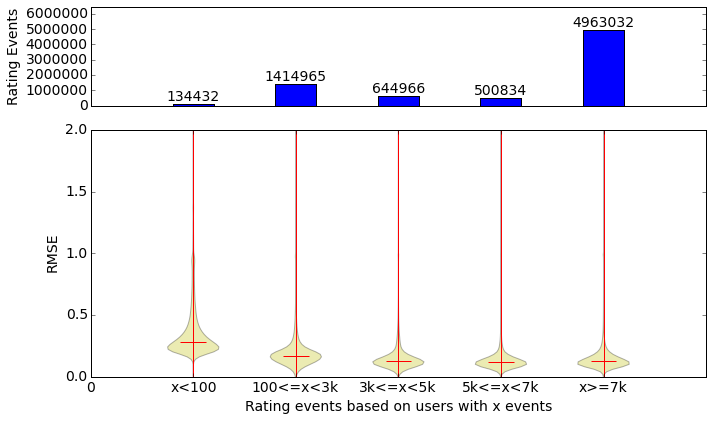

In [10]:
draw_violin(a,b,c,d,e,'Rating events based on users with x events', ['x<100','100<=x<3k','3k<=x<5k','5k<=x<7k','x>=7k'])

### Item analysis

In [15]:
koch_gb_item = base_fd.groupby('itemid')
# group users by rating count
a = koch_gb_item.filter(lambda x: len(x) < 20)
print a.shape
b = koch_gb_item.filter(lambda x: 20 <= len(x) < 50)
print b.shape
c = koch_gb_item.filter(lambda x: 50 <= len(x) < 100)
print c.shape
d = koch_gb_item.filter(lambda x: 100 <= len(x) < 200)
print d.shape
e = koch_gb_item.filter(lambda x: len(x) >= 200)
print e.shape

(2051053, 5)
(3155377, 5)
(2112229, 5)
(336074, 5)
(3496, 5)


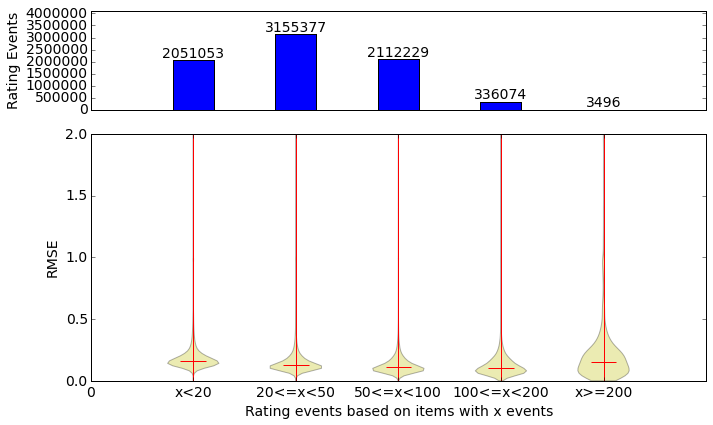

In [16]:
draw_violin(a,b,c,d,e,'Rating events based on items with x events', ['x<20','20<=x<50','50<=x<100','100<=x<200','x>=200'])

### Cuisine Type analysis

In [7]:
cuires_df.columns=['cid','rmse','mae']
koch_gb_cui = cuires_df.groupby('cid')
# cuisine types by event count
a = koch_gb_cui.filter(lambda x: len(x) < 500)
print a.shape
b = koch_gb_cui.filter(lambda x: 500 <= len(x) < 2000)
print b.shape
c = koch_gb_cui.filter(lambda x: 2000 <= len(x) < 5000)
print c.shape
d = koch_gb_cui.filter(lambda x: 5000 <= len(x) < 10000)
print d.shape
e = koch_gb_cui.filter(lambda x: len(x) >= 10000)
print e.shape

(0, 3)
(0, 3)
(0, 3)
(0, 3)
(7658229, 3)


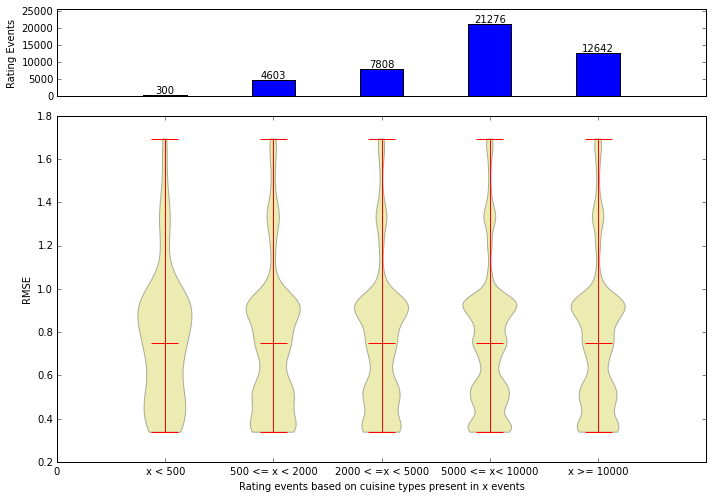

In [376]:
draw_violin(a,b,c,d,e,'Rating events based on cuisine types present in x events', ['x < 500','500 <= x < 2000','2000 < =x < 5000','5000 <= x< 10000','x >= 10000'])

### Dietary Group analysis

In [21]:
dgres_df.columns=['dgid','rmse','mae']
koch_gb_dg = dgres_df.groupby('dgid')
# dietarey groups by event count
a = koch_gb_dg.filter(lambda x: len(x) < 10000)
print a.shape
b = koch_gb_dg.filter(lambda x: 10000 <= len(x) < 20000)
print b.shape
c = koch_gb_dg.filter(lambda x: 20000 <= len(x) < 50000)
print c.shape
d = koch_gb_dg.filter(lambda x: 50000 <= len(x) < 100000)
print d.shape
e = koch_gb_dg.filter(lambda x: len(x) >= 100000)
print e.shape

(173406, 3)
(191590, 3)
(1051483, 3)
(1500972, 3)
(4740778, 3)


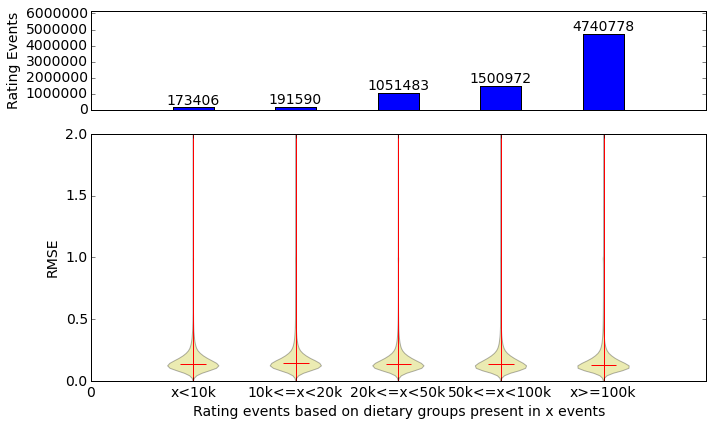

In [23]:
draw_violin(a,b,c,d,e,'Rating events based on dietary groups present in x events', ['x<10k','10k<=x<20k','20k<=x<50k','50k<=x<100k','x>=100k'])

### Ingredient analysis

In [30]:
ingres_df.columns=['ingid','rmse','mae']
koch_gb_ing = ingres_df.groupby('ingid')
# ingredient groups by event count
a = koch_gb_ing.filter(lambda x: len(x) < 1000)
print a.shape
b = koch_gb_ing.filter(lambda x: 1000 <= len(x) < 10000)
print b.shape
c = koch_gb_ing.filter(lambda x: 10000 <= len(x) < 30000)
print c.shape
d = koch_gb_ing.filter(lambda x: 30000 <= len(x) < 50000)
print d.shape
e = koch_gb_ing.filter(lambda x: len(x) >= 50000)
print e.shape

(24625412, 3)
(4475352, 3)
(14944280, 3)
(0, 3)

Exception KeyboardInterrupt in 'zmq.backend.cython.message.Frame.__dealloc__'

 ignored


KeyboardInterrupt: 

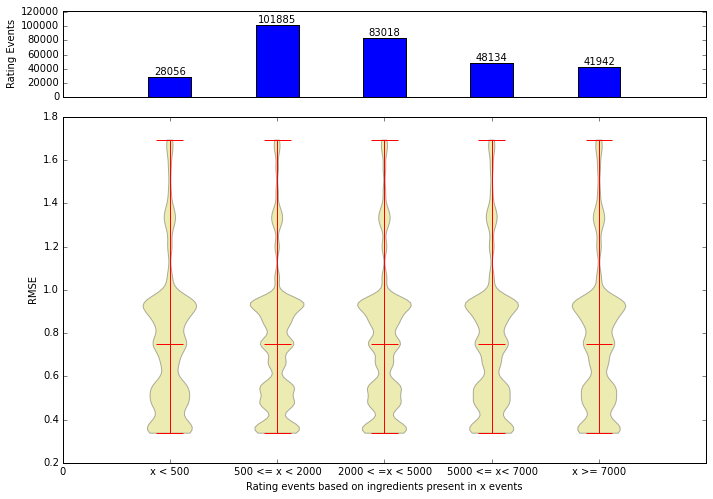

In [380]:
draw_violin(a,b,c,d,e,'Rating events based on ingredients present in x events', ['x < 500','500 <= x < 2000','2000 < =x < 5000','5000 <= x< 7000','x >= 7000'])